In [2]:
# Import libraries
import numpy as np
import pandas as pd

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
#Read Data
df = pd.read_csv('SalesJan2009.csv')

#check head
df.head()

,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,Latitude,Longitude
0,1/2/09 6:17,Product1,1200,Mastercard,carolina,Basildon,England,United Kingdom,1/2/09 6:00,1/2/09 6:08,51.500000,-1.116667
1,1/2/09 4:53,Product1,1200,Visa,Betina,Parkville,MO,United States,1/2/09 4:42,1/2/09 7:49,39.195000,-94.681940
2,1/2/09 13:08,Product1,1200,Mastercard,Federica e Andrea,Astoria,OR,United States,1/1/09 16:21,1/3/09 12:32,46.188060,-123.830000
3,1/3/09 14:44,Product1,1200,Visa,Gouya,Echuca,Victoria,Australia,9/25/05 21:13,1/3/09 14:22,-36.133333,144.750000
4,1/4/09 12:56,Product2,3600,Visa,Gerd W,Cahaba Heights,AL,United States,11/15/08 15:47,1/4/09 12:45,33.520560,-86.802500


In [5]:
#remove  '_' sign in column names
df.columns = df.columns.str.replace('_','')

In [7]:
df.head()

,Transactiondate,Product,Price,PaymentType,Name,City,State,Country,AccountCreated,LastLogin,Latitude,Longitude
0,1/2/09 6:17,Product1,1200,Mastercard,carolina,Basildon,England,United Kingdom,1/2/09 6:00,1/2/09 6:08,51.500000,-1.116667
1,1/2/09 4:53,Product1,1200,Visa,Betina,Parkville,MO,United States,1/2/09 4:42,1/2/09 7:49,39.195000,-94.681940
2,1/2/09 13:08,Product1,1200,Mastercard,Federica e Andrea,Astoria,OR,United States,1/1/09 16:21,1/3/09 12:32,46.188060,-123.830000
3,1/3/09 14:44,Product1,1200,Visa,Gouya,Echuca,Victoria,Australia,9/25/05 21:13,1/3/09 14:22,-36.133333,144.750000
4,1/4/09 12:56,Product2,3600,Visa,Gerd W,Cahaba Heights,AL,United States,11/15/08 15:47,1/4/09 12:45,33.520560,-86.802500


In [12]:
# find unique values in Product,PaymentType, and Country 
print(df['Product'].unique())
print()
print(df['PaymentType'].unique())
print()
print(df['Country'].unique())

['Product1' 'Product2' 'Product3' 'Product3 ']

['Mastercard' 'Visa' 'Diners' 'Amex']

['United Kingdom' 'United States' 'Australia' 'Israel' 'France'
 'Netherlands' 'Ireland' 'Canada' 'India' 'South Africa' 'Finland'
 'Switzerland' 'Denmark' 'Belgium' 'Sweden' 'Norway' 'Luxembourg' 'Italy'
 'Germany' 'Moldova' 'Spain' 'United Arab Emirates' 'Bahrain' 'Turkey'
 'Kuwait' 'Malta' 'Hungary' 'Austria' 'Jersey' 'Malaysia' 'Iceland'
 'South Korea' 'Brazil' 'New Zealand' 'Russia' 'Monaco' 'Hong Kong'
 'Thailand' 'Bulgaria' 'Latvia' 'Poland' 'Philippines' 'Argentina'
 'The Bahamas' 'Japan' 'Czech Republic' 'Cayman Isls' 'Ukraine'
 'Dominican Republic' 'China' 'Greece' 'Costa Rica' 'Bermuda' 'Romania'
 'Guatemala' 'Mauritius']


In [61]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,998.0,16337.675351,11560.347239,2500.00000,12000.000000,12000.000000,12000.000000,130000.000000
Latitude,998.0,39.015705,19.508572,-41.46500,35.816944,42.320695,51.050000,64.837780
Longitude,998.0,-41.337820,67.389479,-159.48528,-87.991670,-73.730695,4.916667,174.766667


In [62]:
df.dtypes

Transactiondate    datetime64[ns]
Product                    object
Price                       int64
PaymentType                object
Name                       object
City                       object
State                      object
Country                    object
AccountCreated             object
LastLogin                  object
Latitude                  float64
Longitude                 float64
Month                      object
DayOfWeek                  object
dtype: object

### Convert object to int

In [63]:
df['Price'] = df['Price'].astype(str)

In [64]:
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].str.replace('.','')

In [65]:
df['Price'] = df['Price'].astype(int)

In [66]:
df['Price'].dtypes

dtype('int64')

### Convert Transactiondate from strings to DateTime object

In [67]:
df.Transactiondate = pd.to_datetime(df.Transactiondate)

In [68]:
type(df.Transactiondate.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [134]:
#create month
df['Month'] = df['Transactiondate'].apply(lambda time: time.month)

#create day of week
df['DayOfWeek'] = df['Transactiondate'].apply(lambda time: time.dayofweek)

#create hour of day
df['Hour'] = df['Transactiondate'].apply(lambda time: time.hour)

In [70]:
df.DayOfWeek.value_counts().sort_index(ascending=True)

0    159
1    129
2    134
3    156
4    143
5    124
6    153
Name: DayOfWeek, dtype: int64

In [135]:
# create dictionary for month
mmap = {1:'January'}
mmap
# create dictionary for DayOfWeek
dmap = {0:'Monday',1:"Tuesday",2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
dmap

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

In [136]:
df.Month = df.Month.map(mmap)
df.DayOfWeek = df.DayOfWeek.map(dmap)

In [137]:
df.head()

,Transactiondate,Product,Price,PaymentType,Name,City,State,Country,AccountCreated,LastLogin,Latitude,Longitude,Month,DayOfWeek,Hour
0,2009-01-02 06:17:00,Product1,12000,Mastercard,carolina,Basildon,England,United Kingdom,1/2/09 6:00,1/2/09 6:08,51.500000,-1.116667,January,Friday,6
1,2009-01-02 04:53:00,Product1,12000,Visa,Betina,Parkville,MO,United States,1/2/09 4:42,1/2/09 7:49,39.195000,-94.681940,January,Friday,4
2,2009-01-02 13:08:00,Product1,12000,Mastercard,Federica e Andrea,Astoria,OR,United States,1/1/09 16:21,1/3/09 12:32,46.188060,-123.830000,January,Friday,13
3,2009-01-03 14:44:00,Product1,12000,Visa,Gouya,Echuca,Victoria,Australia,9/25/05 21:13,1/3/09 14:22,-36.133333,144.750000,January,Saturday,14
4,2009-01-04 12:56:00,Product2,36000,Visa,Gerd W,Cahaba Heights,AL,United States,11/15/08 15:47,1/4/09 12:45,33.520560,-86.802500,January,Sunday,12


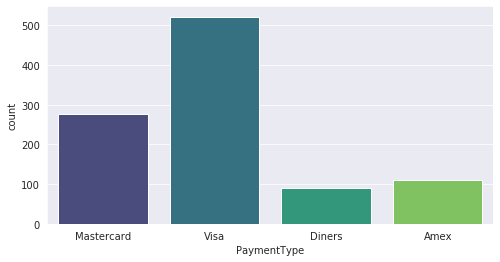

In [138]:
sns.countplot(x='PaymentType', data = df, palette = 'viridis')

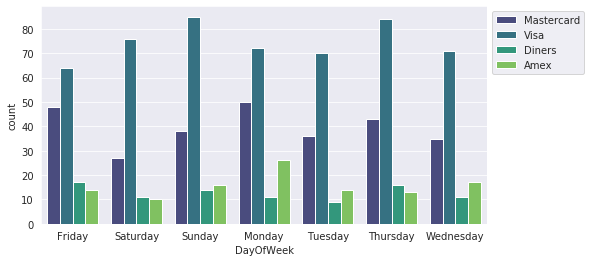

In [139]:
sns.countplot(x='DayOfWeek', data = df, hue='PaymentType', palette = 'viridis')
plt.legend(bbox_to_anchor=(1,1),loc=2,)

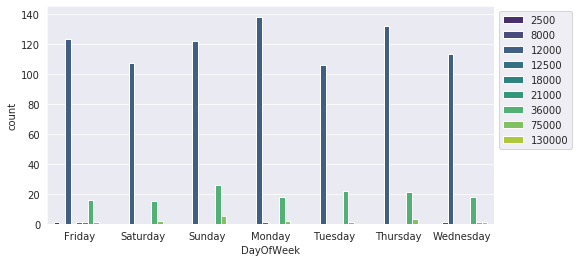

In [140]:
sns.countplot(x='DayOfWeek', data = df, hue='Price', palette = 'viridis')
plt.legend(bbox_to_anchor=(1,1),loc=2)

In [141]:
df.PaymentType.astype('category')

0      Mastercard
1            Visa
2      Mastercard
3            Visa
4            Visa
          ...    
993          Visa
994          Visa
995          Amex
996        Diners
997          Visa
Name: PaymentType, Length: 998, dtype: category
Categories (4, object): [Amex, Diners, Mastercard, Visa]

In [142]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = 8 , 4

In [143]:
df.columns

Index(['Transactiondate', 'Product', 'Price', 'PaymentType', 'Name', 'City',
       'State', 'Country', 'AccountCreated', 'LastLogin', 'Latitude',
       'Longitude', 'Month', 'DayOfWeek', 'Hour'],
      dtype='object')

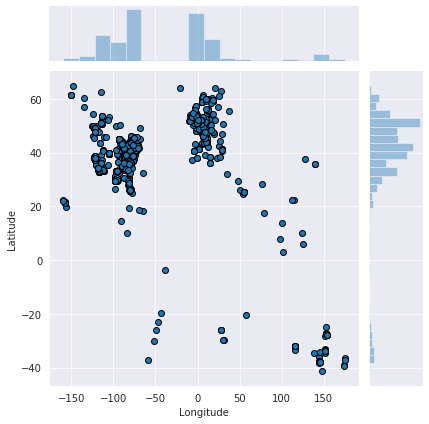

In [144]:
sns.set_style('darkgrid')
j = sns.jointplot(data = df, x = 'Longitude', y='Latitude',edgecolor='black')

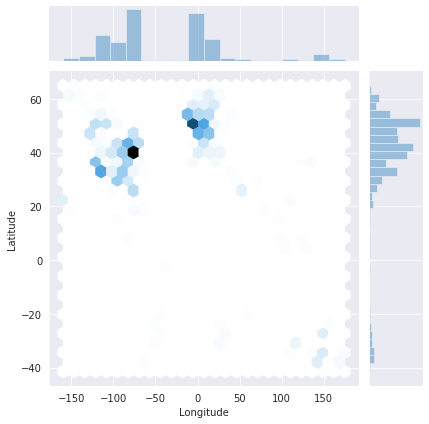

In [145]:
j1 = sns.jointplot(data = df, x = 'Longitude', y='Latitude',kind='hex',)

In [146]:
df.PaymentType.value_counts()

Visa          522
Mastercard    277
Amex          110
Diners         89
Name: PaymentType, dtype: int64

In [147]:
df.Country.value_counts()

United States           463
United Kingdom          100
Canada                   76
Ireland                  49
Australia                38
Switzerland              36
France                   27
Germany                  25
Netherlands              22
Norway                   16
Denmark                  15
Italy                    15
Sweden                   13
Spain                    12
Belgium                   8
Austria                   7
Turkey                    6
New Zealand               6
United Arab Emirates      6
South Africa              5
Brazil                    5
Hungary                   3
Czech Republic            3
Finland                   2
Philippines               2
Japan                     2
Monaco                    2
Malta                     2
Poland                    2
India                     2
Thailand                  2
The Bahamas               2
Bulgaria                  1
Bahrain                   1
China                     1
Greece              

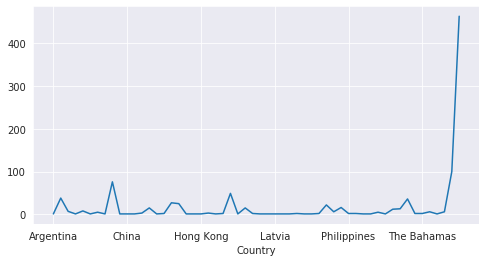

In [149]:
df.groupby('Country').count()['Price'].plot()
plt.show()

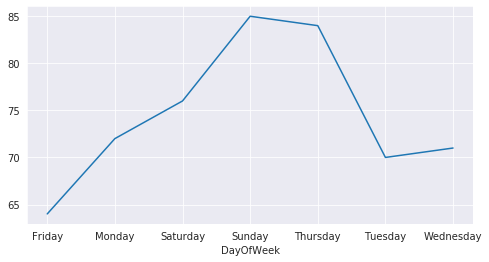

In [150]:
df[df['PaymentType'] == 'Visa'].groupby('DayOfWeek').count()['Price'].plot()

In [159]:
dayHour = df.groupby(['DayOfWeek','Hour']).count()['PaymentType'].unstack()
dayHour 

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Friday,1.0,5.0,4.0,4.0,5.0,10.0,8.0,14.0,5.0,8.0,...,11.0,9.0,2.0,6.0,5.0,4.0,7.0,2.0,3.0,1.0
Monday,3.0,5.0,2.0,7.0,6.0,8.0,9.0,7.0,9.0,5.0,...,8.0,9.0,7.0,3.0,4.0,6.0,5.0,2.0,1.0,4.0
Saturday,1.0,4.0,NaN,5.0,5.0,2.0,4.0,10.0,9.0,12.0,...,9.0,6.0,3.0,3.0,5.0,1.0,4.0,7.0,NaN,2.0
Sunday,3.0,3.0,3.0,2.0,9.0,5.0,9.0,5.0,9.0,8.0,...,8.0,2.0,7.0,14.0,6.0,4.0,4.0,2.0,3.0,2.0
Thursday,2.0,5.0,7.0,6.0,4.0,8.0,5.0,6.0,9.0,7.0,...,5.0,12.0,6.0,1.0,7.0,4.0,4.0,3.0,1.0,4.0
Tuesday,NaN,4.0,8.0,6.0,1.0,10.0,6.0,6.0,10.0,10.0,...,10.0,7.0,5.0,2.0,6.0,3.0,4.0,1.0,1.0,2.0
Wednesday,5.0,4.0,3.0,4.0,6.0,4.0,7.0,11.0,8.0,3.0,...,8.0,2.0,3.0,2.0,5.0,6.0,9.0,1.0,3.0,3.0


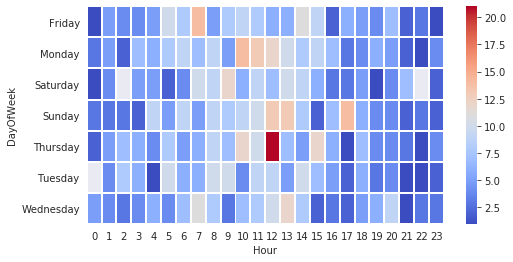

In [167]:
#Create HeatMap
sns.heatmap(dayHour, cmap='coolwarm', linewidth=1)
plt.show()

(array([844.,   2., 136.,   0.,   0.,  15.,   0.,   0.,   0.,   1.]),
 array([  2500.,  15250.,  28000.,  40750.,  53500.,  66250.,  79000.,
         91750., 104500., 117250., 130000.]),
 <a list of 10 Patch objects>)

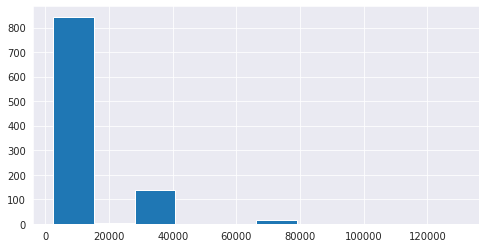

In [170]:
plt.hist(df.Price)

In [173]:
df.PaymentType

0      Mastercard
1            Visa
2      Mastercard
3            Visa
4            Visa
          ...    
993          Visa
994          Visa
995          Amex
996        Diners
997          Visa
Name: PaymentType, Length: 998, dtype: object

In [177]:
df[df.PaymentType == 'Diners'].Country

10      United States
15            Ireland
17              India
19      United States
21            Ireland
            ...      
966     United States
968         Australia
976     United States
992    United Kingdom
996    United Kingdom
Name: Country, Length: 89, dtype: object

(array([444.,   0.,  70.,   0.,   0.,   7.,   0.,   0.,   0.,   1.]),
 array([  2500.,  15250.,  28000.,  40750.,  53500.,  66250.,  79000.,
         91750., 104500., 117250., 130000.]),
 <a list of 10 Patch objects>)

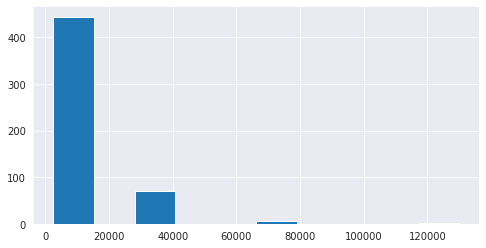

In [179]:
plt.hist(df[df.PaymentType == 'Visa'].Price)

In [231]:
np.linspace(df.Price.min(),df.Price.max() +1)

array([  2500.        ,   5102.06122449,   7704.12244898,  10306.18367347,
        12908.24489796,  15510.30612245,  18112.36734694,  20714.42857143,
        23316.48979592,  25918.55102041,  28520.6122449 ,  31122.67346939,
        33724.73469388,  36326.79591837,  38928.85714286,  41530.91836735,
        44132.97959184,  46735.04081633,  49337.10204082,  51939.16326531,
        54541.2244898 ,  57143.28571429,  59745.34693878,  62347.40816327,
        64949.46938776,  67551.53061224,  70153.59183673,  72755.65306122,
        75357.71428571,  77959.7755102 ,  80561.83673469,  83163.89795918,
        85765.95918367,  88368.02040816,  90970.08163265,  93572.14285714,
        96174.20408163,  98776.26530612, 101378.32653061, 103980.3877551 ,
       106582.44897959, 109184.51020408, 111786.57142857, 114388.63265306,
       116990.69387755, 119592.75510204, 122194.81632653, 124796.87755102,
       127398.93877551, 130001.        ])

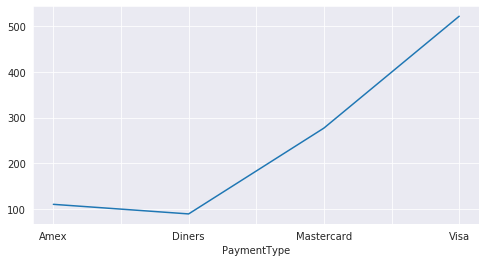

In [243]:
df.groupby('PaymentType').count()['Price'].plot()

In [256]:
a = df.groupby(['PaymentType','Price']).agg('mean')
a

Latitude   Longitude       Hour
PaymentType Price                                   
Amex        8000    38.890280  -77.084440  11.000000
            12000   36.701686  -59.292455  10.732558
            18000   33.952500  -84.550000   7.000000
            36000   41.749008  -62.701441  13.047619
            75000   42.946940  -76.429440   4.000000
Diners      12000   43.058807  -45.379097  10.790123
            36000   30.876388  -28.190972  12.000000
            75000   38.466667   14.950000   7.000000
Mastercard  12000   38.680069  -41.350028  10.666667
            12500   33.248610 -111.633610  12.000000
            21000   41.372220  -73.733890   7.000000
            36000   37.524032  -34.342031  10.769231
            75000   28.979944  -47.732388   8.800000
Visa        2500    34.189720 -118.130280   7.000000
            12000   39.396061  -37.548693  11.101580
            36000   38.499682  -30.653519  11.414286
            75000   28.514167  -66.885356   6.714286
            130000  39.579170 -104.876390  18.000000

In [270]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = 8 , 4

[(23, 63)]

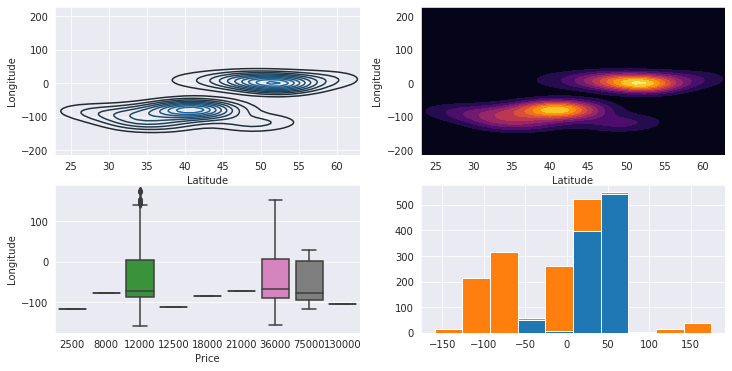

In [370]:
a,b = plt.subplots(2,2,figsize=(12,6))
kd1 = sns.kdeplot(df.Latitude, df.Longitude, shade = False, ax = b[0,0])
kd2 = sns.kdeplot(df.Latitude, df.Longitude, shade = True,cmap ="inferno", ax = b[0,1])
bp = sns.boxplot(data = df, x='Price',y='Longitude', ax = b[1,0])
kd = b[1,1].hist([df.Latitude, df.Longitude],bins=10,stacked=True)
kd1.set(xlim = (23,63))
kd2.set(xlim = (23,63))

In [342]:
df.head()

,Transactiondate,Product,Price,PaymentType,Name,City,State,Country,AccountCreated,LastLogin,Latitude,Longitude,Month,DayOfWeek,Hour
0,2009-01-02 06:17:00,Product1,12000,Mastercard,carolina,Basildon,England,United Kingdom,1/2/09 6:00,1/2/09 6:08,51.500000,-1.116667,January,Friday,6
1,2009-01-02 04:53:00,Product1,12000,Visa,Betina,Parkville,MO,United States,1/2/09 4:42,1/2/09 7:49,39.195000,-94.681940,January,Friday,4
2,2009-01-02 13:08:00,Product1,12000,Mastercard,Federica e Andrea,Astoria,OR,United States,1/1/09 16:21,1/3/09 12:32,46.188060,-123.830000,January,Friday,13
3,2009-01-03 14:44:00,Product1,12000,Visa,Gouya,Echuca,Victoria,Australia,9/25/05 21:13,1/3/09 14:22,-36.133333,144.750000,January,Saturday,14
4,2009-01-04 12:56:00,Product2,36000,Visa,Gerd W,Cahaba Heights,AL,United States,11/15/08 15:47,1/4/09 12:45,33.520560,-86.802500,January,Sunday,12


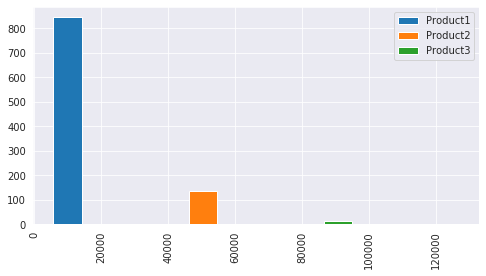

In [339]:

plt.hist([df[df.Product == 'Product1'].Price,\
         df[df.Product == 'Product2'].Price,\
         df[df.Product == 'Product3'].Price],bins=4,label=['Product1','Product2','Product3']) 
plt.xticks(rotation='90')
plt.legend()
plt.show()